# Exploratory Data Analysis (EDA) for Diabetes Readmission Prediction

In this notebook, I conduct an EDA for Diabetes Readmission Prediction project. <br>
The goal of this analysis is to understand the dataset's structure, identify patterns, and uncover insights that will inform subsequent modeling efforts.

**Author:** Andrés Felipe Echeverri Giraldo (akatowolf@hotmail.com) <br>
**Date:** 2024-08-29 <br>
**Notebook Version:** 1.0 <br>
**Python Version:** X.Y.Z <br>
**Libraries:** pandas, numpy, matplotlib, seaborn <br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.stats import entropy
import itertools
import sys
sys.path.insert(0, '../src')
import eda_utils

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_colwidth', 100)

In [3]:
# Load the diabetes dataset
diabetes = pd.read_csv('../data/raw/diabetic_data.csv')

# Load the mappings csv
mappings_df = pd.read_csv('../data/raw/IDS_mapping.csv')

# First data approach
print("Diabetes dataset")
print(tabulate(diabetes.head(), headers='keys', tablefmt='pipe'))
print("The shape of diabetes dataset is: ",diabetes.shape)
print("\n" * 1)
print("Mappings")
print(tabulate(mappings_df.head(), headers='keys', tablefmt='pipe'))
print("The shape of mappings is: ",mappings_df.shape)


Diabetes dataset
|    |   encounter_id |   patient_nbr | race            | gender   | age     | weight   |   admission_type_id |   discharge_disposition_id |   admission_source_id |   time_in_hospital | payer_code   | medical_specialty        |   num_lab_procedures |   num_procedures |   num_medications |   number_outpatient |   number_emergency |   number_inpatient |   diag_1 | diag_2   | diag_3   |   number_diagnoses |   max_glu_serum |   A1Cresult | metformin   | repaglinide   | nateglinide   | chlorpropamide   | glimepiride   | acetohexamide   | glipizide   | glyburide   | tolbutamide   | pioglitazone   | rosiglitazone   | acarbose   | miglitol   | troglitazone   | tolazamide   | examide   | citoglipton   | insulin   | glyburide-metformin   | glipizide-metformin   | glimepiride-pioglitazone   | metformin-rosiglitazone   | metformin-pioglitazone   | change   | diabetesMed   | readmitted   |
|---:|---------------:|--------------:|:----------------|:---------|:--------|:---------|----

In [4]:
print(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
print("Describe numerical features: ")
print(tabulate(diabetes.drop(['encounter_id', 'patient_nbr'], axis=1).describe(), headers='keys', tablefmt='pipe'))
print("\n" * 1)
print("Describe categorical features: ")
print(tabulate(diabetes.describe(exclude=np.number), headers='keys', tablefmt='pipe'))

Describe numerical features: 
|       |   admission_type_id |   discharge_disposition_id |   admission_source_id |   time_in_hospital |   num_lab_procedures |   num_procedures |   num_medications |   number_outpatient |   number_emergency |   number_inpatient |   number_diagnoses |
|:------|--------------------:|---------------------------:|----------------------:|-------------------:|---------------------:|-----------------:|------------------:|--------------------:|-------------------:|-------------------:|-------------------:|
| count |        101766       |               101766       |          101766       |       101766       |          101766      |     101766       |      101766       |       101766        |      101766        |      101766        |       101766       |
| mean  |             2.02401 |                    3.71564 |               5.75444 |            4.39599 |              43.0956 |          1.33973 |          16.0218  |            0.369357 |           0.197836 | 

In [6]:
# Calculate entropy for the features and the target
for column in diabetes.drop('readmitted', axis=1).columns:
    e_var = entropy(diabetes[column].value_counts(normalize=True))
    e_target = entropy(diabetes['readmitted'].value_counts(normalize=True))
    if e_var - e_target < 0.1:
        print(f"Entropy of {column}: {e_var:.4f} ", f"Difference: {e_var - e_target:.4f}")

Entropy of race: 0.7895  Difference: -0.1557
Entropy of gender: 0.6906  Difference: -0.2546
Entropy of weight: 0.1844  Difference: -0.7608
Entropy of number_outpatient: 0.6945  Difference: -0.2507
Entropy of number_emergency: 0.4755  Difference: -0.4697
Entropy of metformin: 0.5616  Difference: -0.3836
Entropy of repaglinide: 0.0843  Difference: -0.8609
Entropy of nateglinide: 0.0428  Difference: -0.9024
Entropy of chlorpropamide: 0.0071  Difference: -0.9381
Entropy of glimepiride: 0.2215  Difference: -0.7237
Entropy of acetohexamide: 0.0001  Difference: -0.9451
Entropy of glipizide: 0.4268  Difference: -0.5184
Entropy of glyburide: 0.3846  Difference: -0.5606
Entropy of tolbutamide: 0.0021  Difference: -0.9431
Entropy of pioglitazone: 0.2749  Difference: -0.6703
Entropy of rosiglitazone: 0.2464  Difference: -0.6988
Entropy of acarbose: 0.0212  Difference: -0.9240
Entropy of miglitol: 0.0035  Difference: -0.9417
Entropy of troglitazone: 0.0003  Difference: -0.9449
Entropy of tolazamide

* 'Examide' and 'Citoglipton' each have only one category. These variables are related to drug prescriptions but do not provide any relevant information.
* 'Weight' is usually a good indicator of diabetes-related problems, but in this dataset, there is approximately 97% missing data, rendering it not useful for analysis.
* A significant number of features are related to drug prescriptions or dosage changes and have very few cases. We need to be cautious with these features.

Number of duplicated rows:  0
Number of duplicated ids:  30248


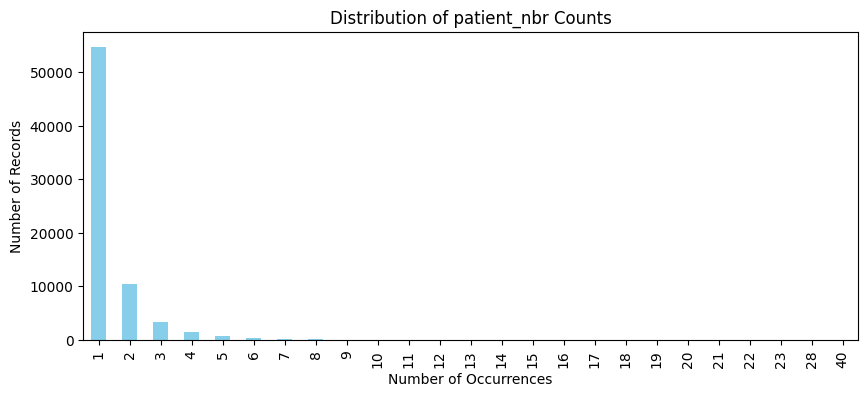

In [7]:
print("Number of duplicated rows: ",diabetes.duplicated().sum())
print("Number of duplicated ids: ",diabetes['patient_nbr'].duplicated().sum())
eda_utils.count_distribution(diabetes, 'patient_nbr')

* There is a significant amount of duplicated IDs in the dataset. It is necessary to validate whether these duplicates carry relevant information.

In [8]:
missing = diabetes.isna().sum()[diabetes.isna().sum() > 0]
print("Number of missing values per column: \n", missing)
print("\n" * 1)
print("Number of missing values when missing == ? \n", {col: (diabetes[col] == '?').sum() for col in diabetes.columns if (diabetes[col] == '?').sum() > 0})
print("\n" * 1)
for column in missing.index:
    print(diabetes[column].value_counts())

Number of missing values per column: 
 max_glu_serum    96420
A1Cresult        84748
dtype: int64


Number of missing values when missing == ? 
 {'race': 2273, 'weight': 98569, 'payer_code': 40256, 'medical_specialty': 49949, 'diag_1': 21, 'diag_2': 358, 'diag_3': 1423}


max_glu_serum
Norm    2597
>200    1485
>300    1264
Name: count, dtype: int64
A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64


* Missing data is present in the form of "?" for some columns.
* The columns "max_glu_serum", "A1Cresult" have missing data. Missing data in these columns indicates that the tests were not performed.

In [9]:
# Categorical and numerical variables based on metada
numerical = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
categorical = [col for col in diabetes.columns if col not in numerical]
print("Categorical variables: ", categorical)
print("Numerical variables: ", numerical)

Categorical variables:  ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
Numerical variables:  ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


c:\Users\USUARIO\Documents\cursos\globant-diabetes-test\globant-diabetes\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


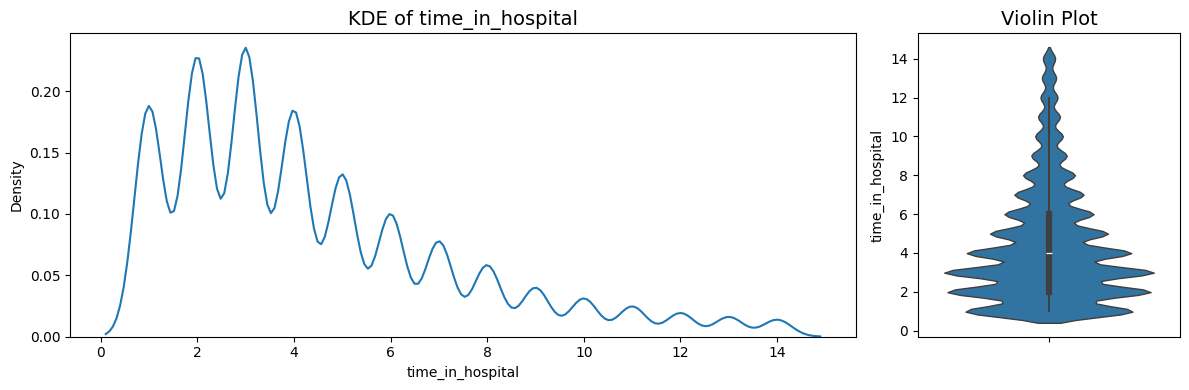

c:\Users\USUARIO\Documents\cursos\globant-diabetes-test\globant-diabetes\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


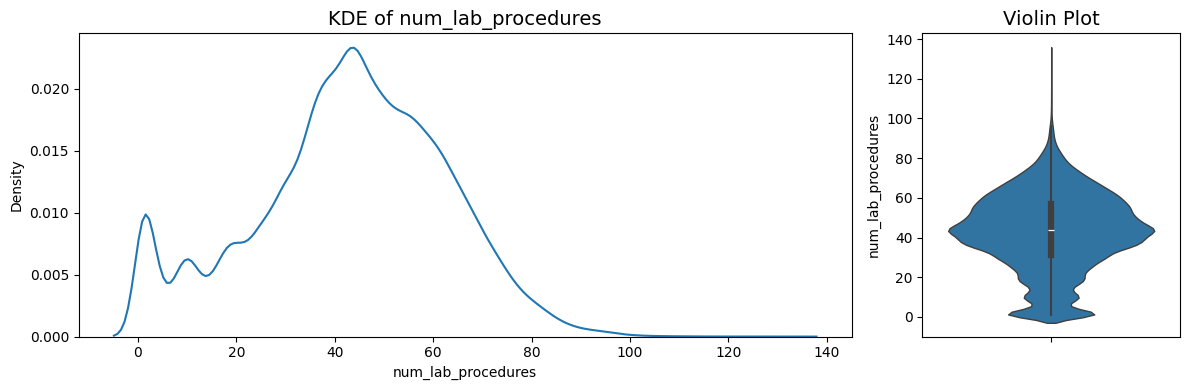

c:\Users\USUARIO\Documents\cursos\globant-diabetes-test\globant-diabetes\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


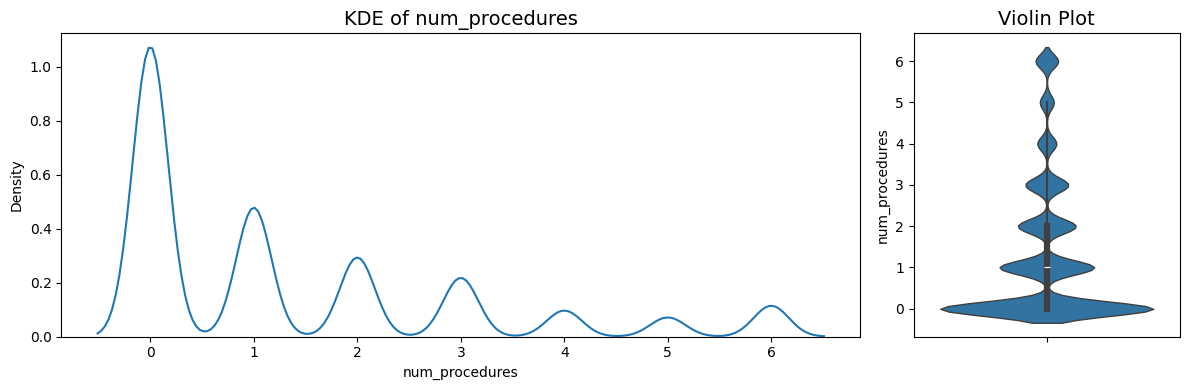

c:\Users\USUARIO\Documents\cursos\globant-diabetes-test\globant-diabetes\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


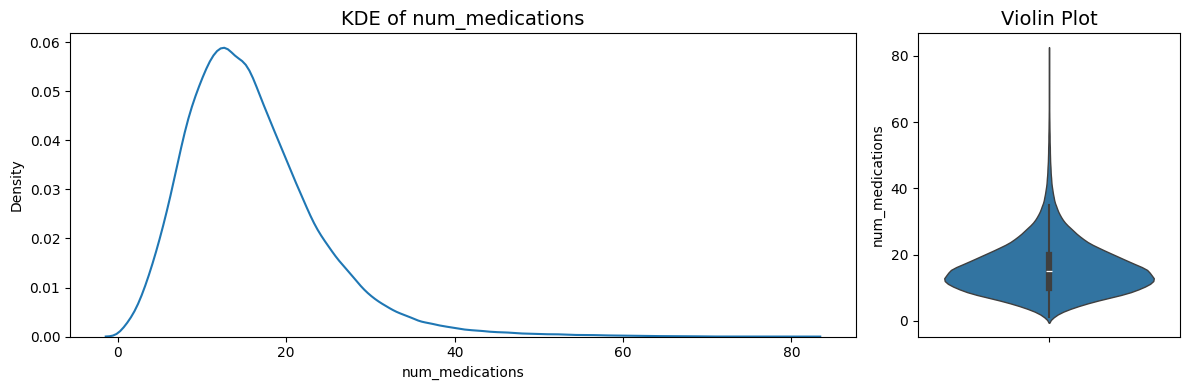

c:\Users\USUARIO\Documents\cursos\globant-diabetes-test\globant-diabetes\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


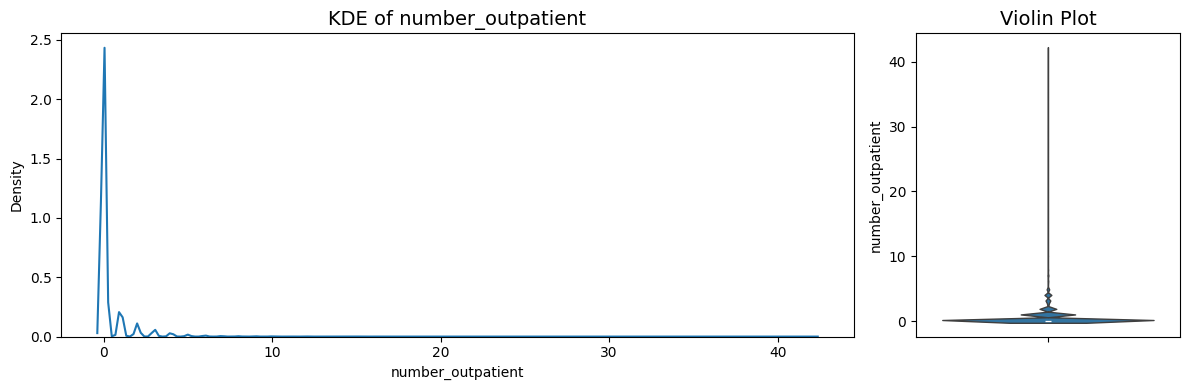

c:\Users\USUARIO\Documents\cursos\globant-diabetes-test\globant-diabetes\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


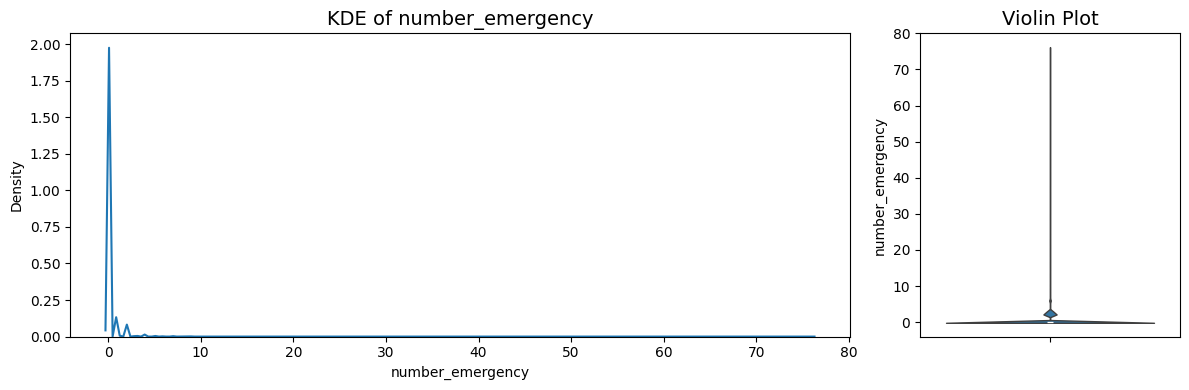

c:\Users\USUARIO\Documents\cursos\globant-diabetes-test\globant-diabetes\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


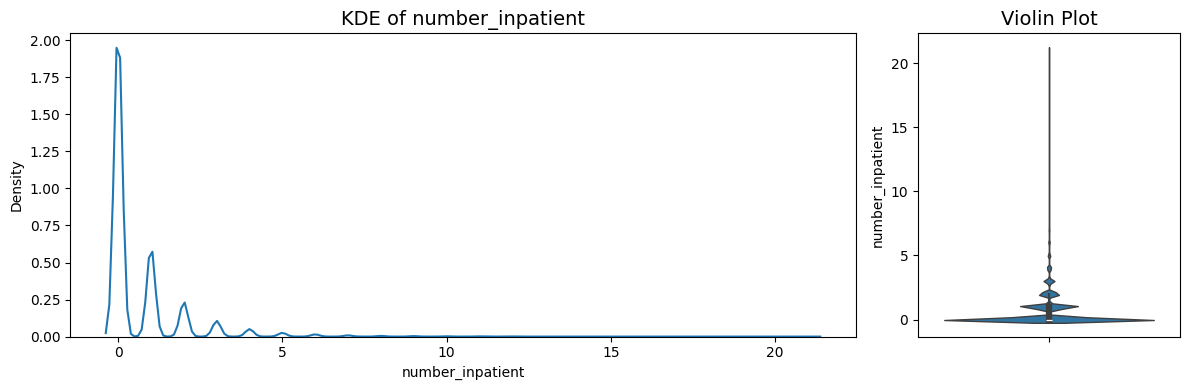

c:\Users\USUARIO\Documents\cursos\globant-diabetes-test\globant-diabetes\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


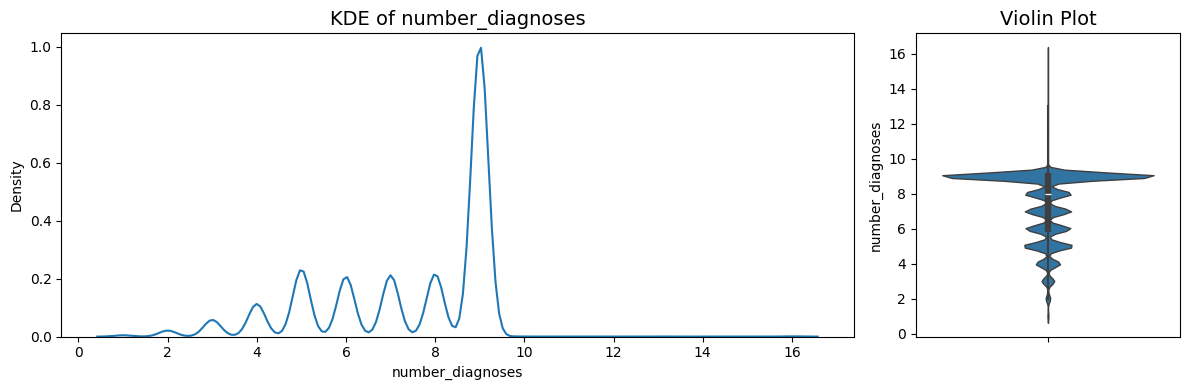

In [10]:
figsize = (12,4)
for column in numerical:
    eda_utils.histplot_with_violin(diabetes, column, None, figsize)

* Important number of outliers in some variables.

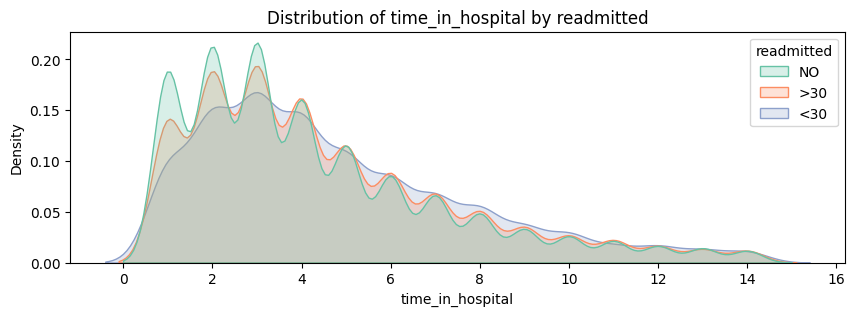

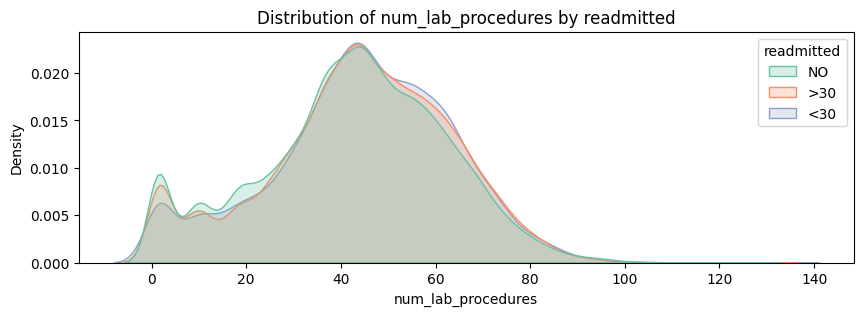

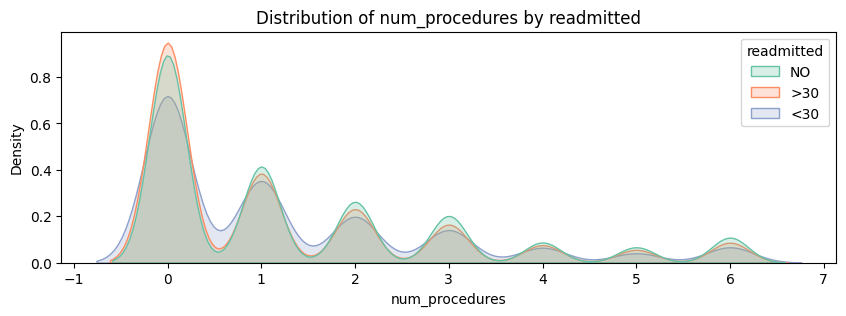

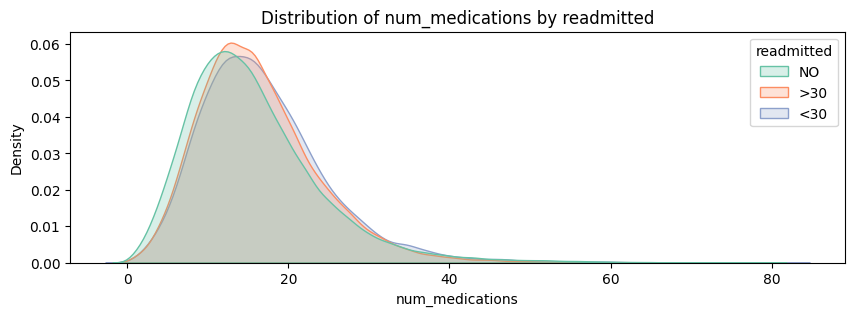

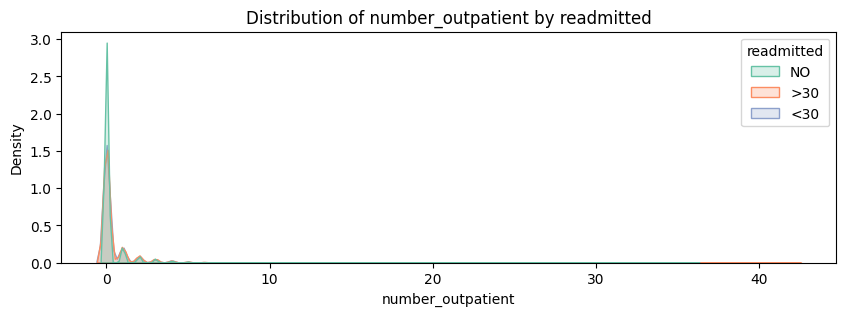

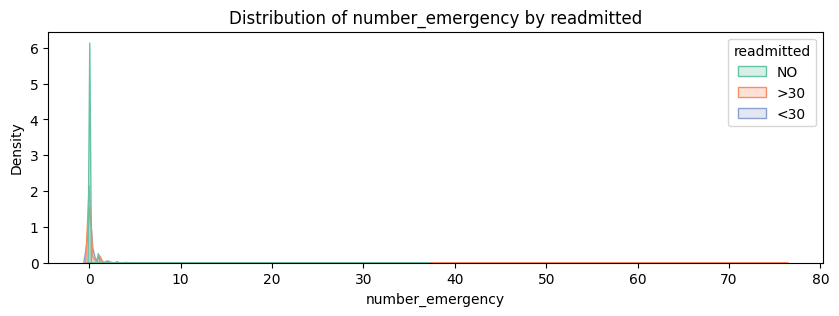

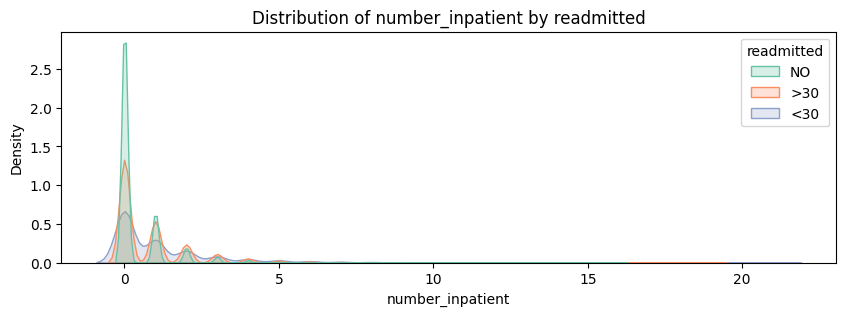

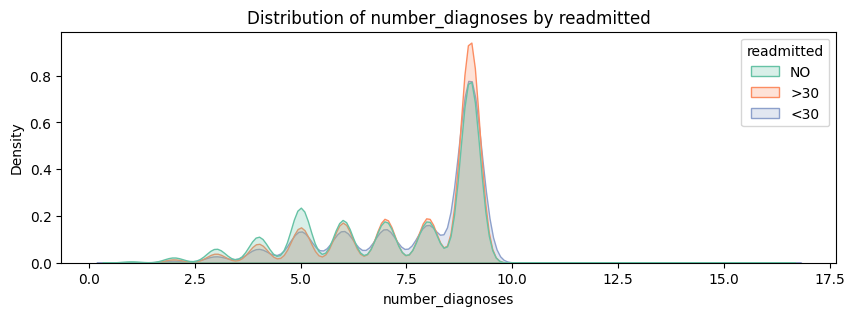

In [11]:
figsize = (10,3)
for column in numerical:
    eda_utils.kdeplot_by_target(diabetes, column, 'readmitted',figsize)

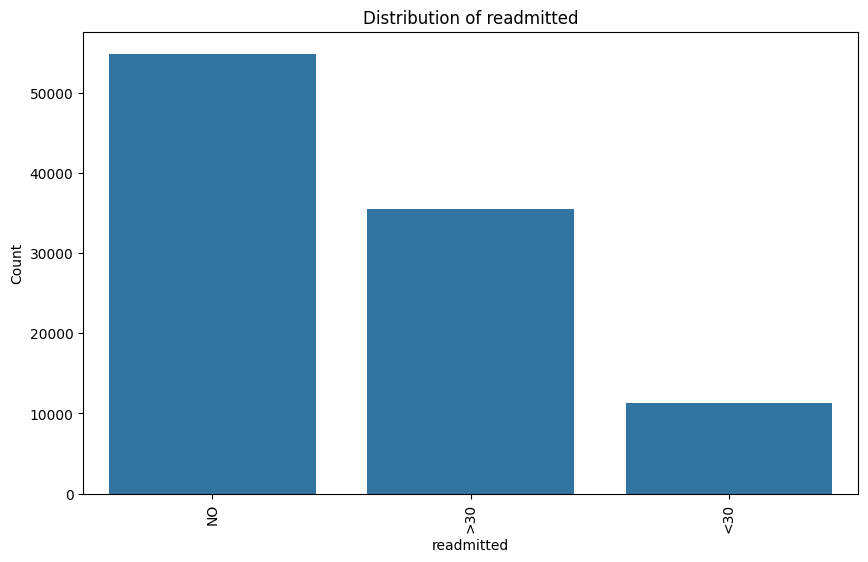

Target: NO, Percentage: 53.91%
Target: >30, Percentage: 34.93%
Target: <30, Percentage: 11.16%


In [12]:
figsize = (10,3)
eda_utils.barplot(diabetes, 'readmitted')
distribution = diabetes['readmitted'].value_counts(normalize=True) * 100
for category, percentage in distribution.items():
    print(f"Target: {category}, Percentage: {percentage:.2f}%")

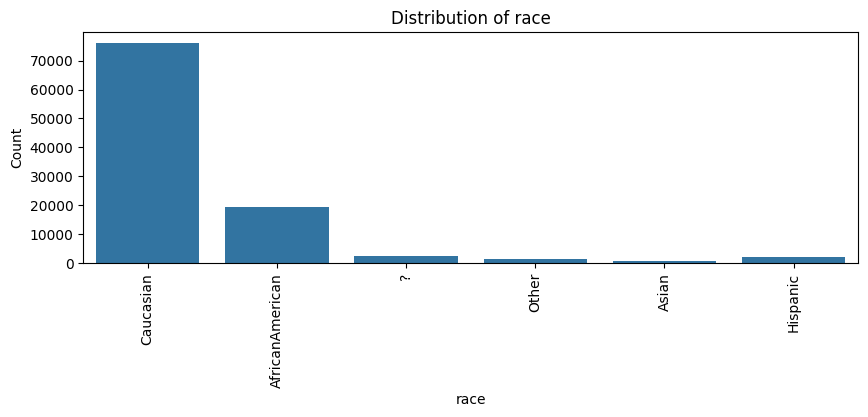

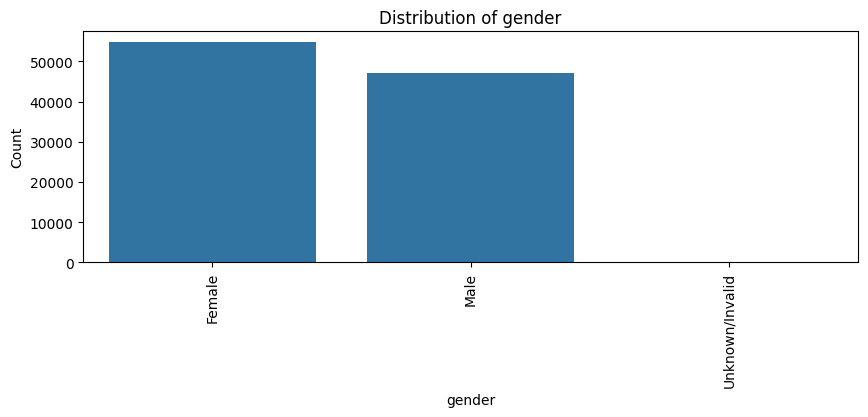

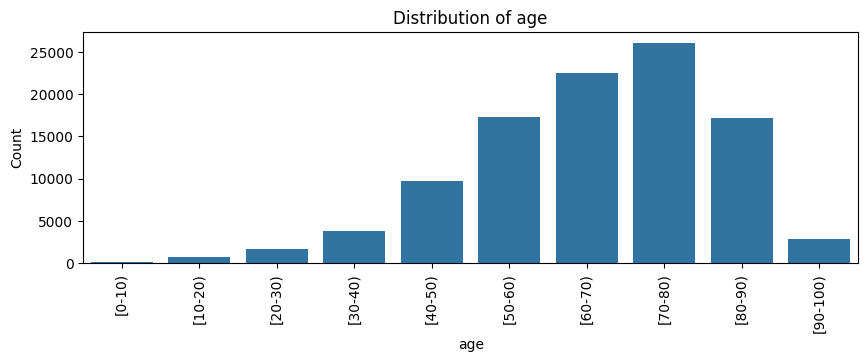

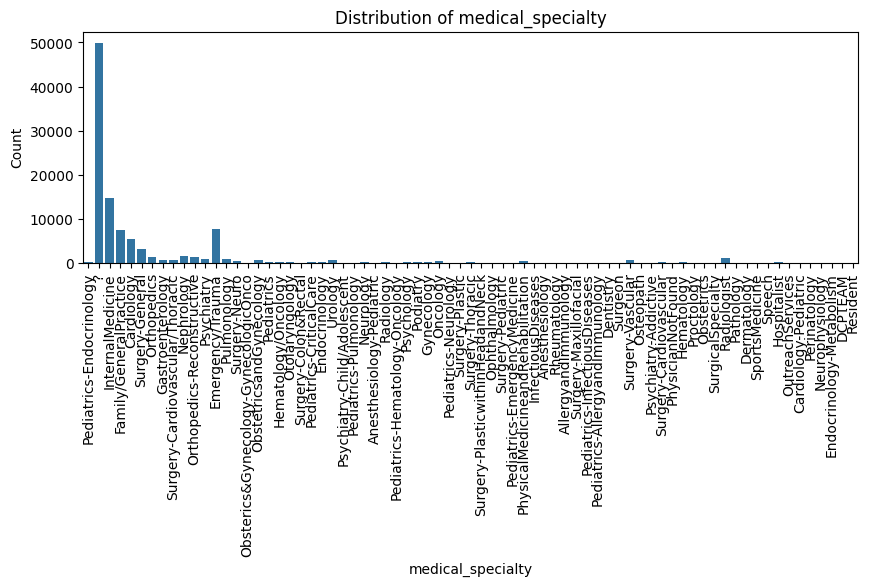

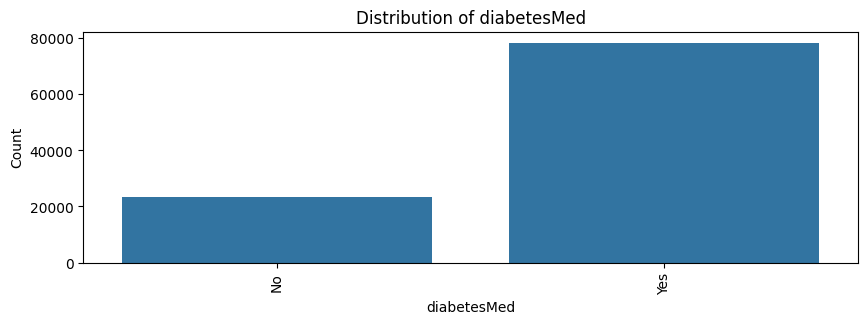

In [13]:
figsize = (10,3)
for column in ['race', 'gender', 'age', 'medical_specialty', 'diabetesMed']:
    eda_utils.barplot(diabetes, column, None, figsize)

In [14]:
diabetes.race.unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

<Figure size 1000x300 with 0 Axes>

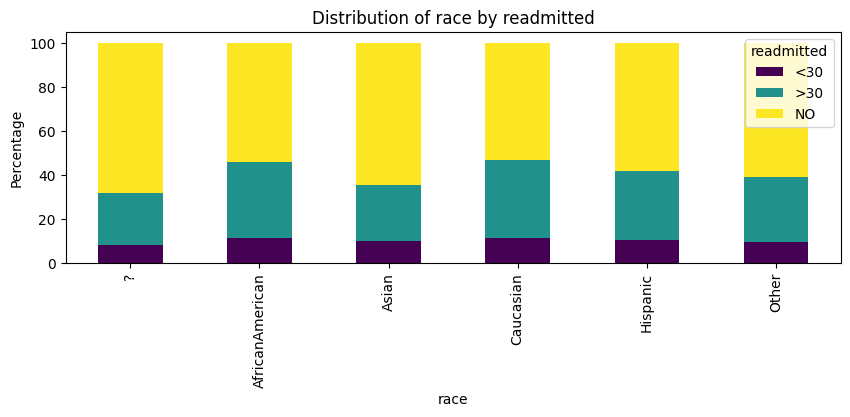

<Figure size 1000x300 with 0 Axes>

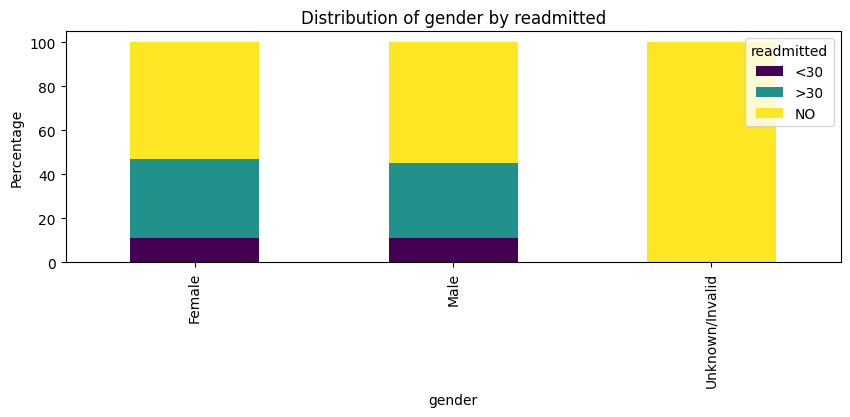

<Figure size 1000x300 with 0 Axes>

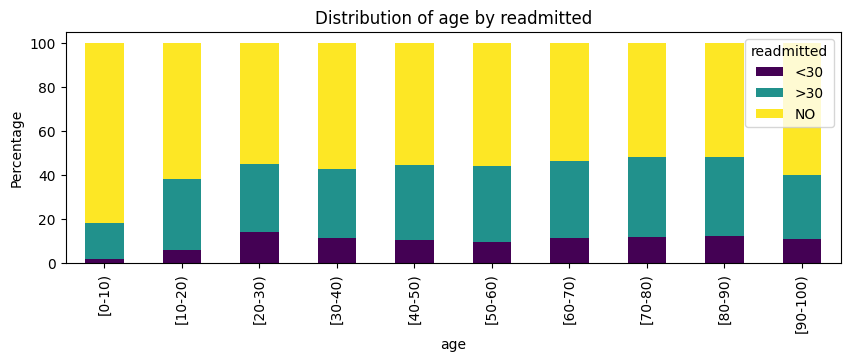

<Figure size 1000x300 with 0 Axes>

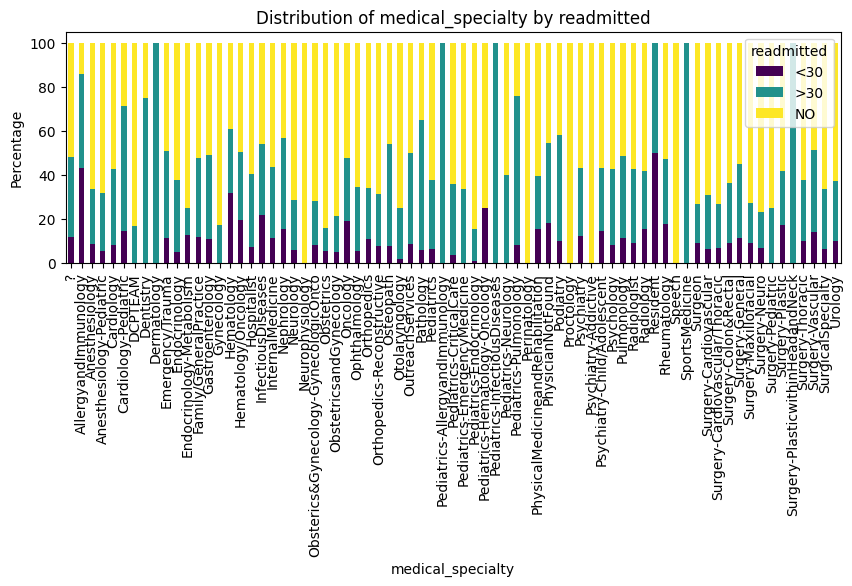

<Figure size 1000x300 with 0 Axes>

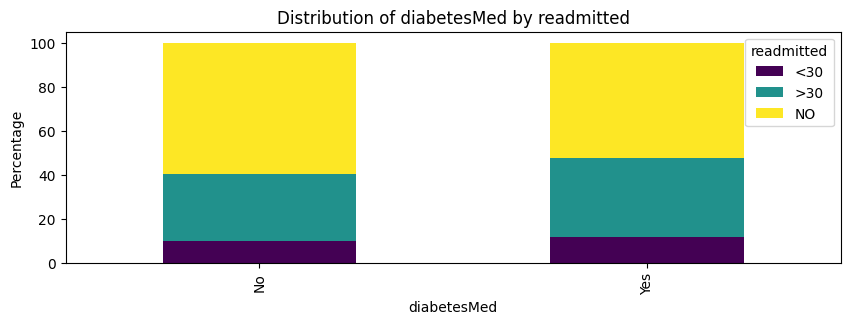

In [15]:
for column in ['race', 'gender', 'age', 'medical_specialty', 'diabetesMed']:
    eda_utils.barplot_target(diabetes, column, 'readmitted', (10,3))

* There is no significant relationship between gender and readmission.
* There is a slight relationship between age and readmission.
* There is a slight relationship between race and readmission.

<Figure size 1000x400 with 0 Axes>

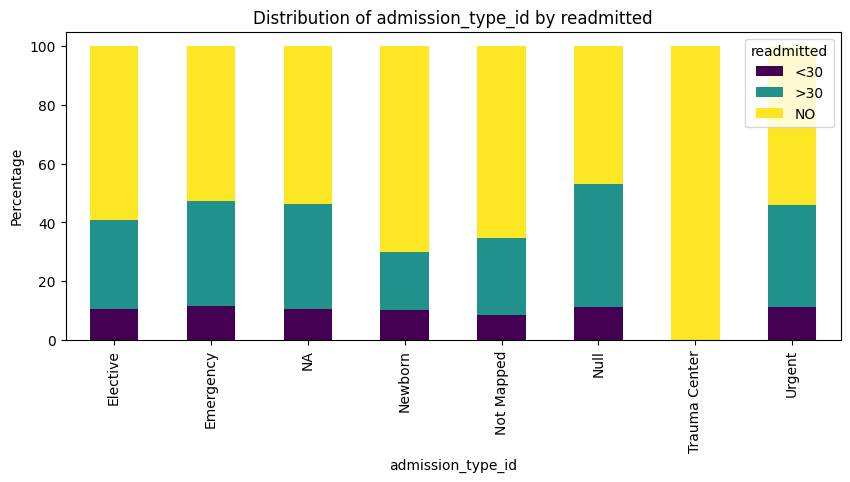

<Figure size 1000x400 with 0 Axes>

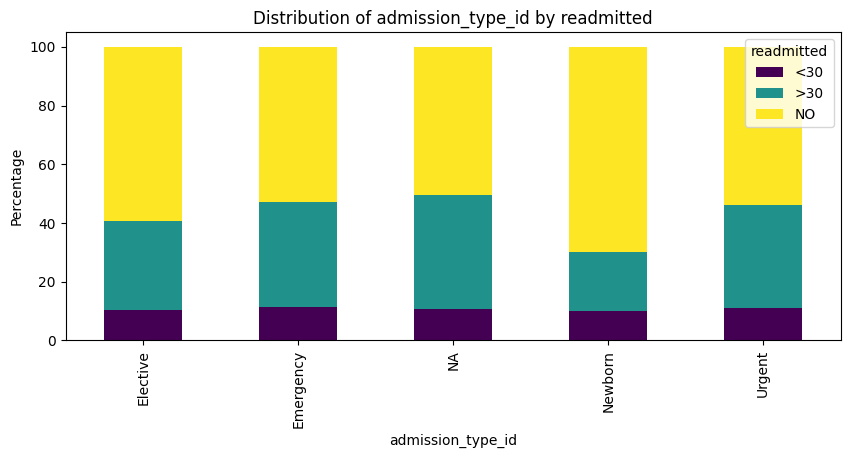

In [16]:
admission_type_id = {1:'Emergency',2:'Urgent',3:'Elective',4:'Newborn',5:'NA',6:'Null',7:'Trauma Center',8:'Not Mapped'}
new_admission_type_id = {1:'Emergency',2:'Urgent',3:'Elective',4:'Newborn',5:'NA',6:'NA',7:'NA',8:'NA'}
eda_utils.barplot_target(diabetes.assign(admission_type_id=diabetes['admission_type_id'].map(admission_type_id)), 'admission_type_id', 'readmitted', (10,4))
eda_utils.barplot_target(diabetes.assign(admission_type_id=diabetes['admission_type_id'].map(new_admission_type_id)), 'admission_type_id', 'readmitted', (10,4))

<Figure size 1000x400 with 0 Axes>

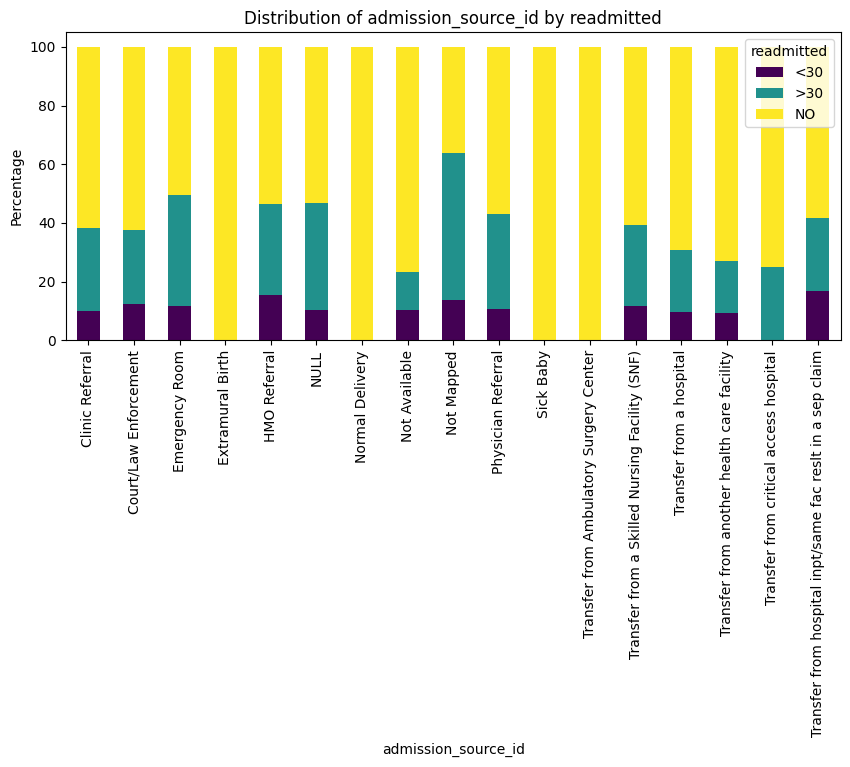

In [17]:
admission_source_id_mapping = {
    1: 'Physician Referral',
    2: 'Clinic Referral',
    3: 'HMO Referral',
    4: 'Transfer from a hospital',
    5: 'Transfer from a Skilled Nursing Facility (SNF)',
    6: 'Transfer from another health care facility',
    7: 'Emergency Room',
    8: 'Court/Law Enforcement',
    9: 'Not Available',
    10: 'Transfer from critical access hospital',
    11: 'Normal Delivery',
    12: 'Premature Delivery',
    13: 'Sick Baby',
    14: 'Extramural Birth',
    15: 'Not Available',
    17: 'NULL',
    18: 'Transfer From Another Home Health Agency',
    19: 'Readmission to Same Home Health Agency',
    20: 'Not Mapped',
    21: 'Unknown/Invalid',
    22: 'Transfer from hospital inpt/same fac reslt in a sep claim',
    23: 'Born inside this hospital',
    24: 'Born outside this hospital',
    25: 'Transfer from Ambulatory Surgery Center',
    26: 'Transfer from Hospice'
}
eda_utils.barplot_target(diabetes.assign(admission_source_id=diabetes['admission_source_id'].map(admission_source_id_mapping)), 'admission_source_id', 'readmitted', (10,4))

<Figure size 1000x400 with 0 Axes>

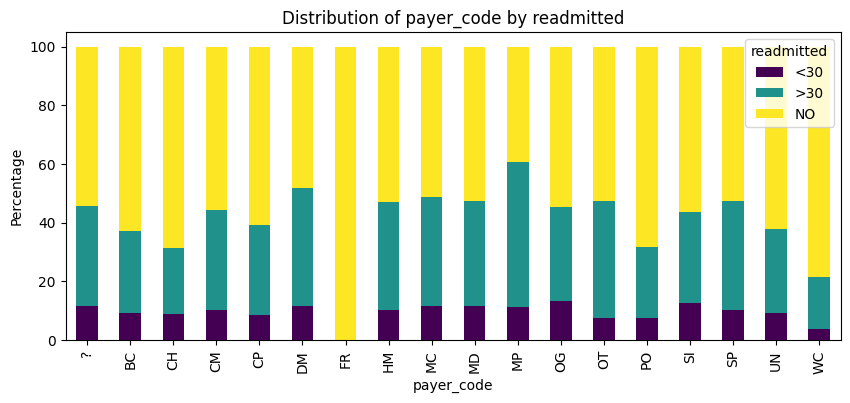

In [18]:
eda_utils.barplot_target(diabetes, 'payer_code', 'readmitted', (10,4))

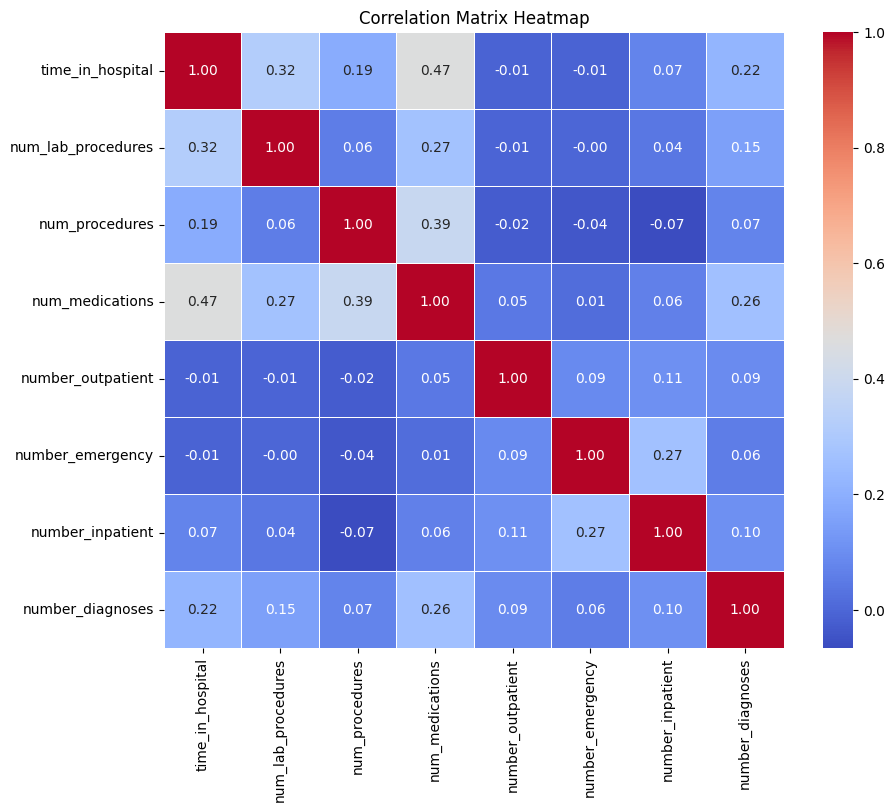

In [19]:
eda_utils.correlation(diabetes[numerical])

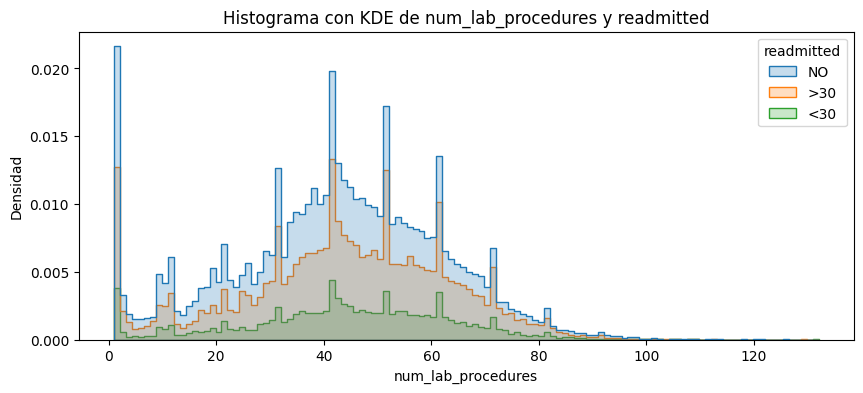

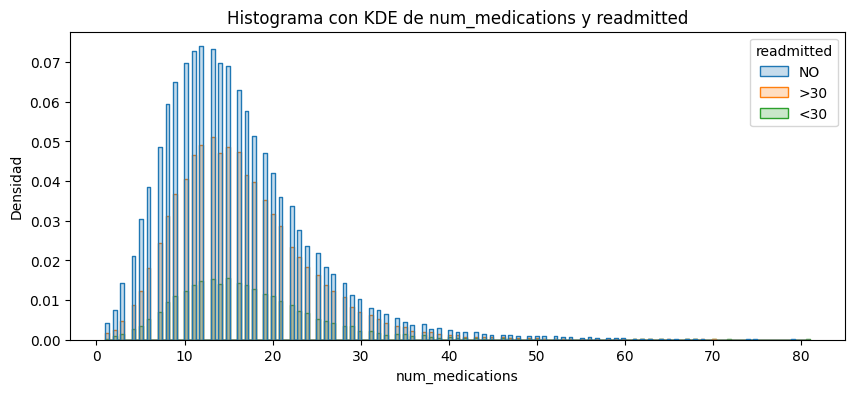

In [20]:
for column in ['num_lab_procedures', 'num_medications']:
    eda_utils.plot_histogram_with_kde(diabetes, column, 'readmitted', figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

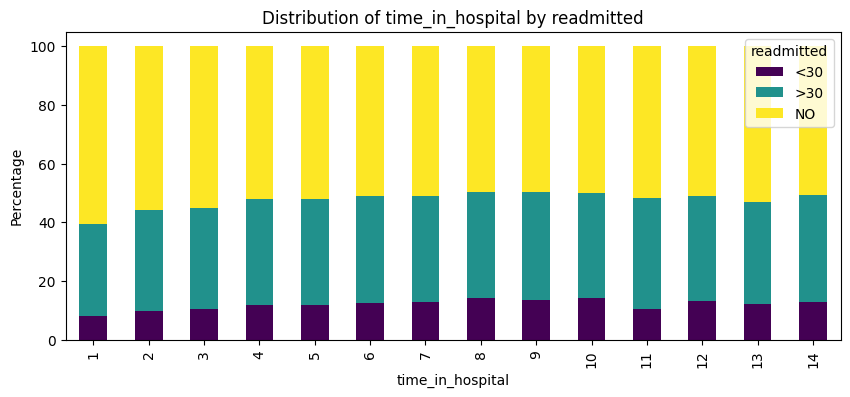

<Figure size 1000x400 with 0 Axes>

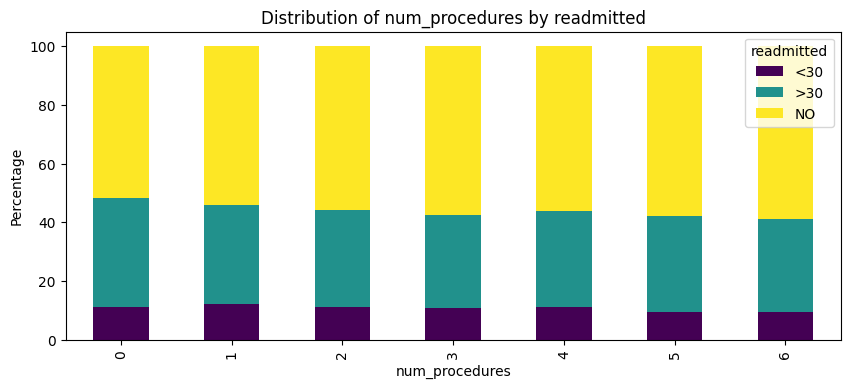

<Figure size 1000x400 with 0 Axes>

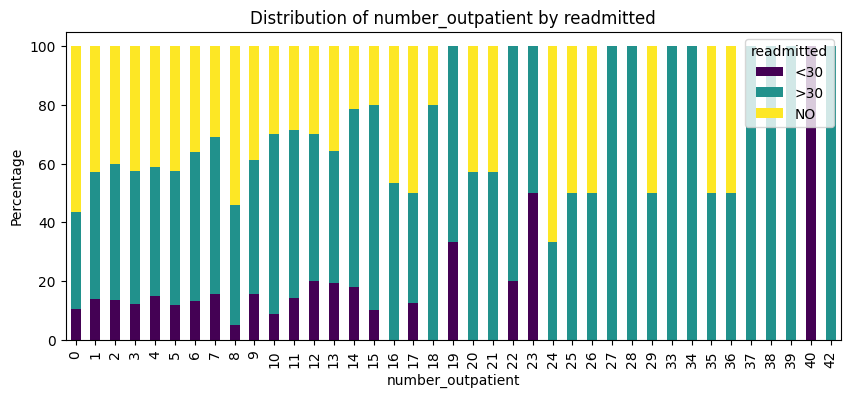

<Figure size 1000x400 with 0 Axes>

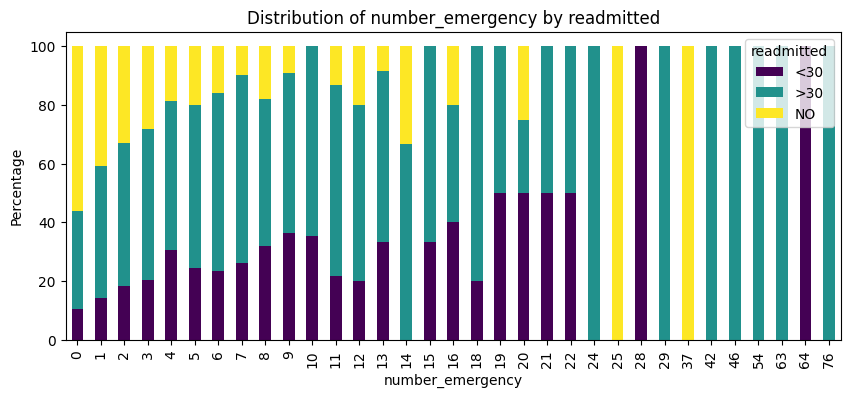

<Figure size 1000x400 with 0 Axes>

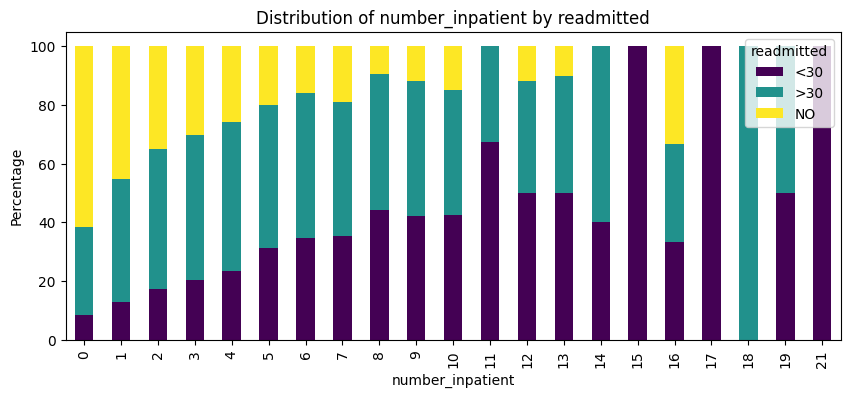

<Figure size 1000x400 with 0 Axes>

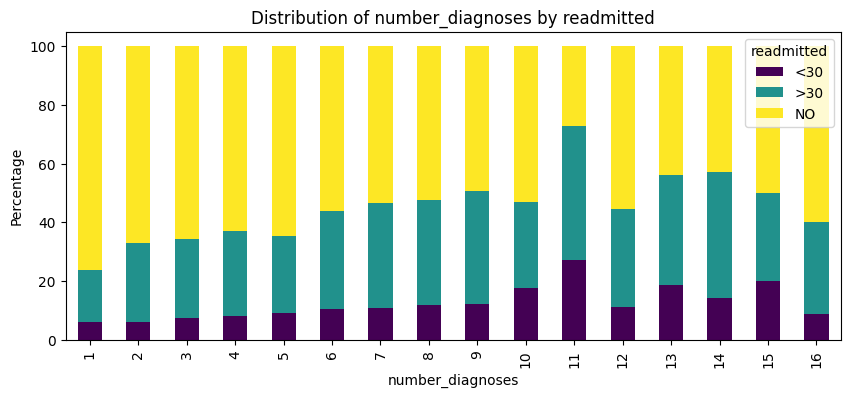

In [21]:
filter = [col for col in numerical if col not in ['num_lab_procedures', 'num_medications']]
for column in filter:
    eda_utils.barplot_target(diabetes, column, 'readmitted', (10,4))

* A new perspective on the discrete variables indicates that outlier treatment is required.

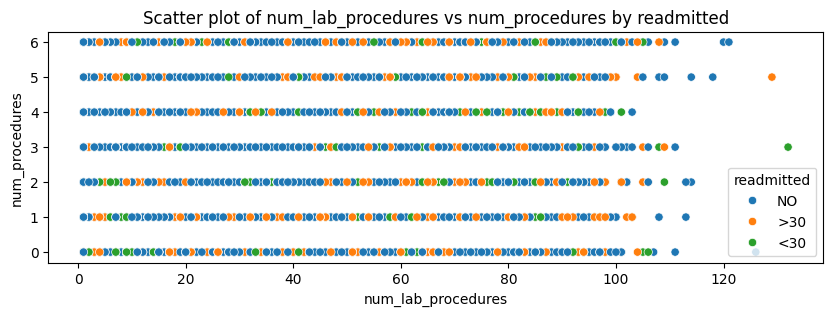

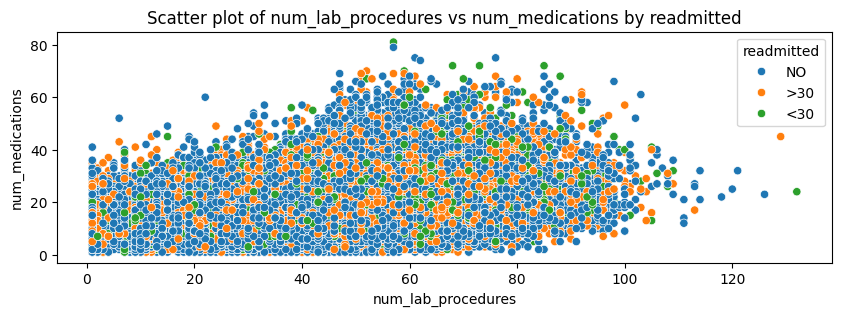

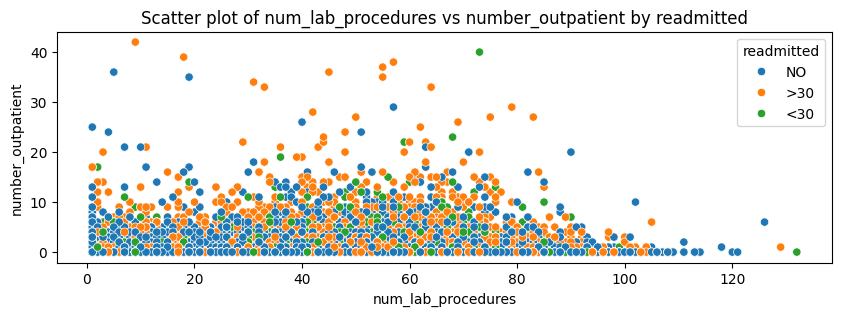

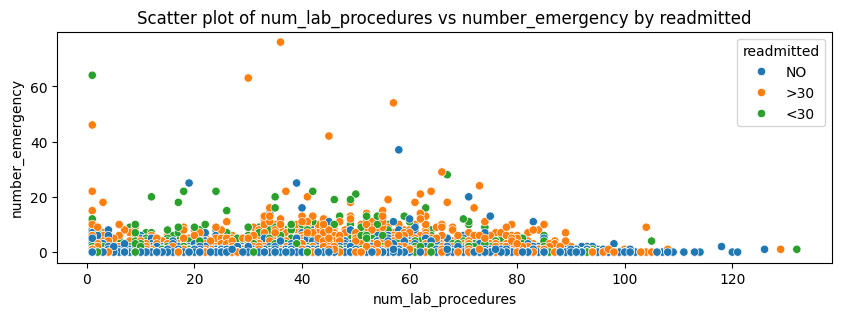

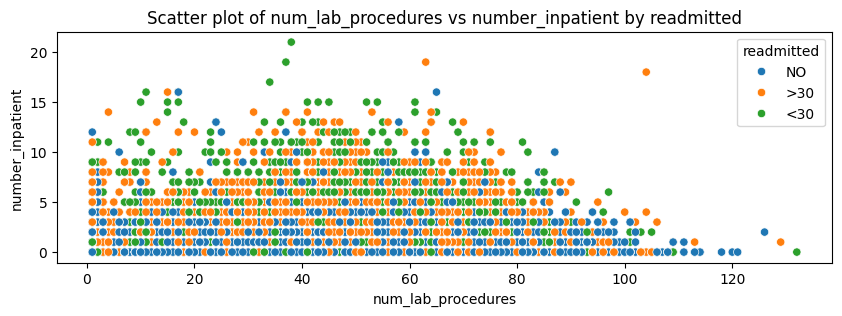

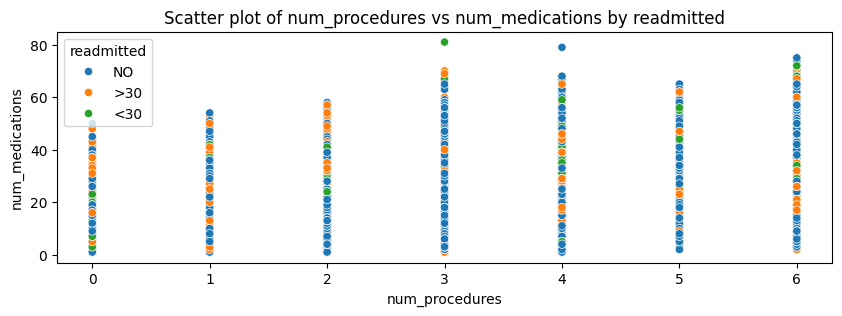

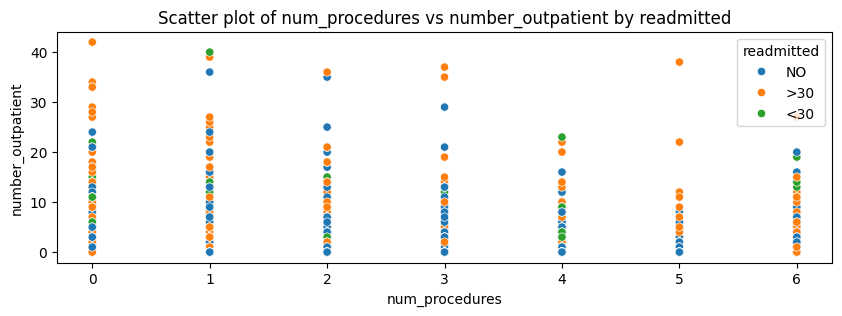

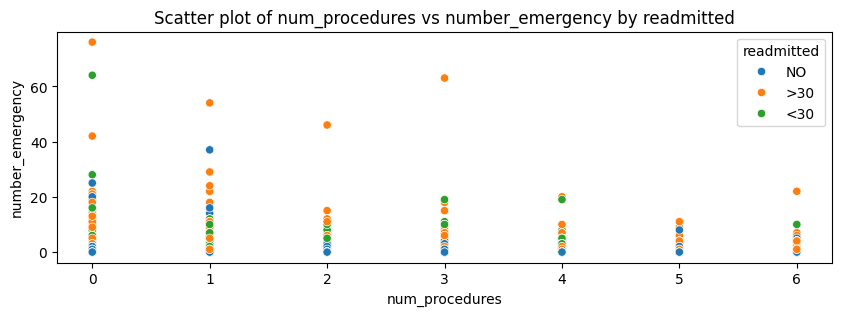

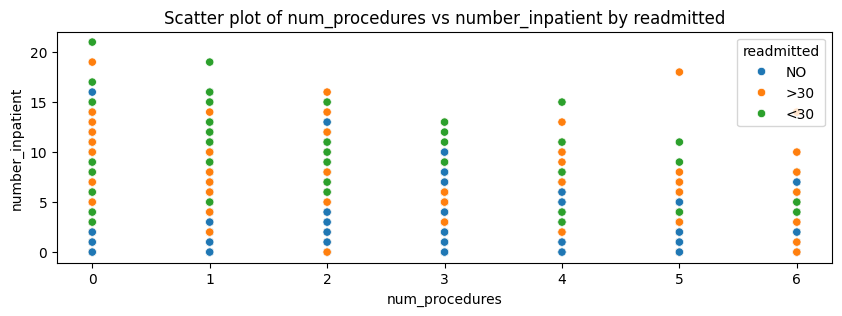

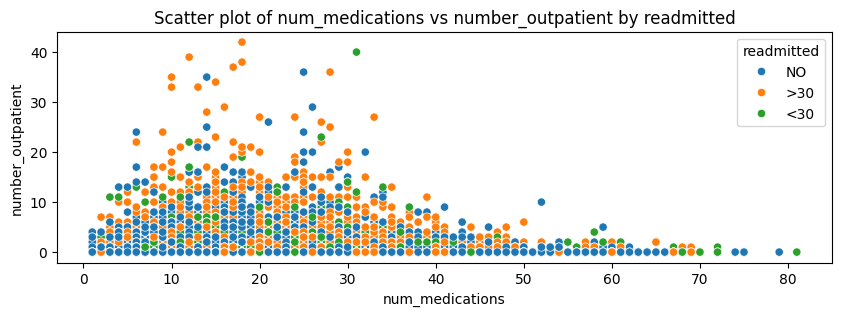

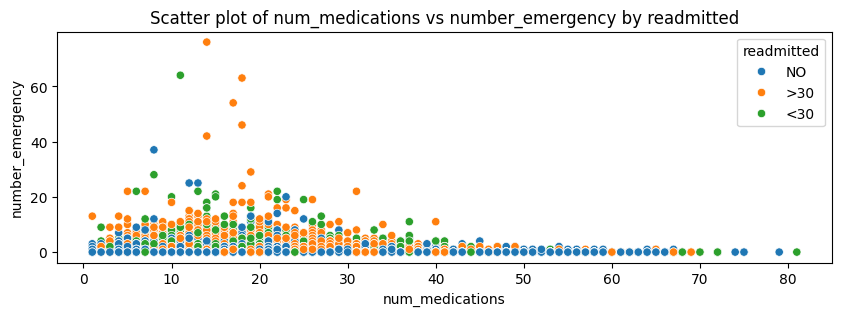

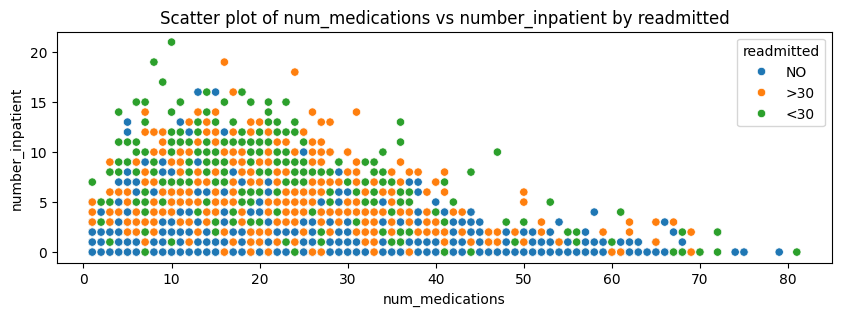

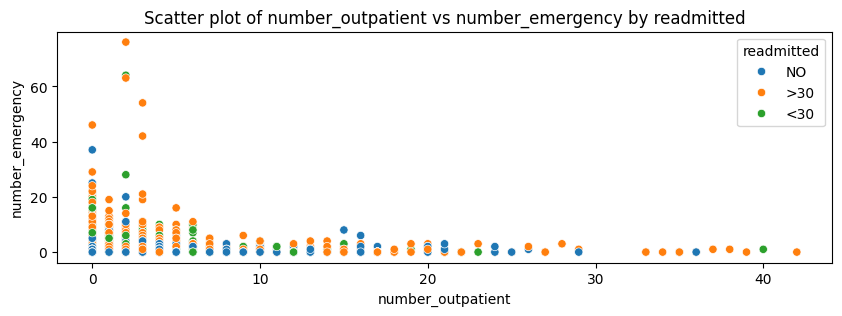

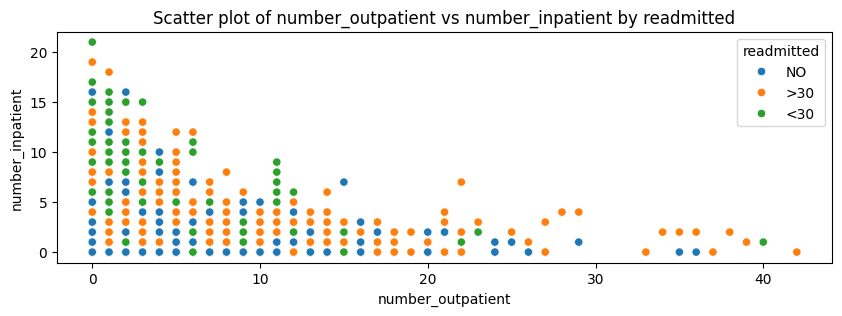

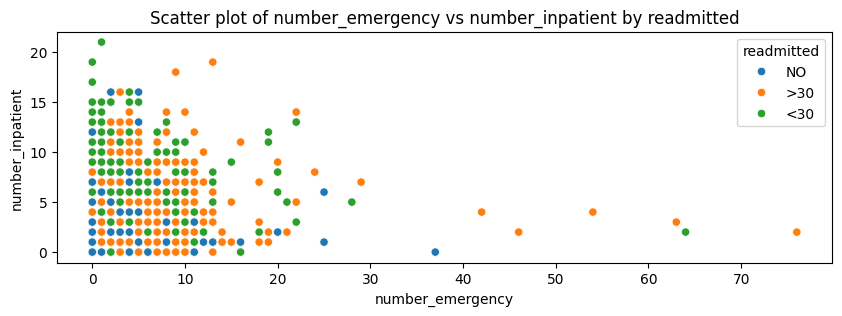

In [22]:
lista = ['num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']
pairs = list(itertools.combinations(lista, 2))
for feature1, feature2 in pairs:
    eda_utils.scatterplot(diabetes, 'readmitted', feature1, feature2, (10,3))

<Figure size 1000x400 with 0 Axes>

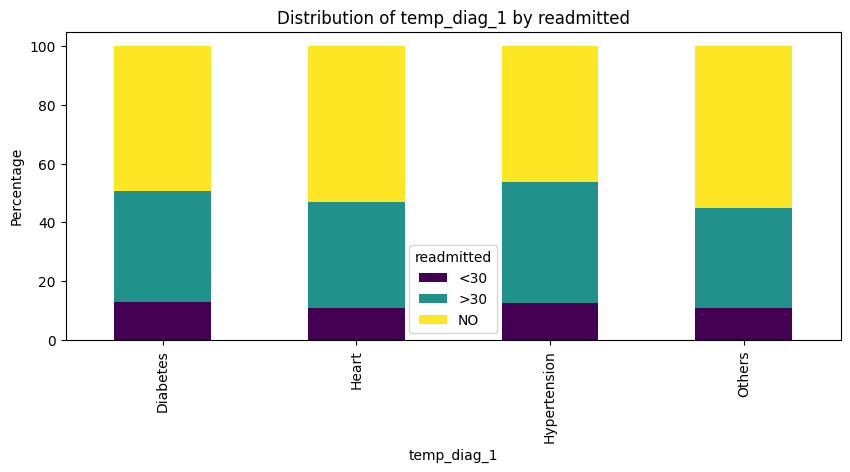

<Figure size 1000x400 with 0 Axes>

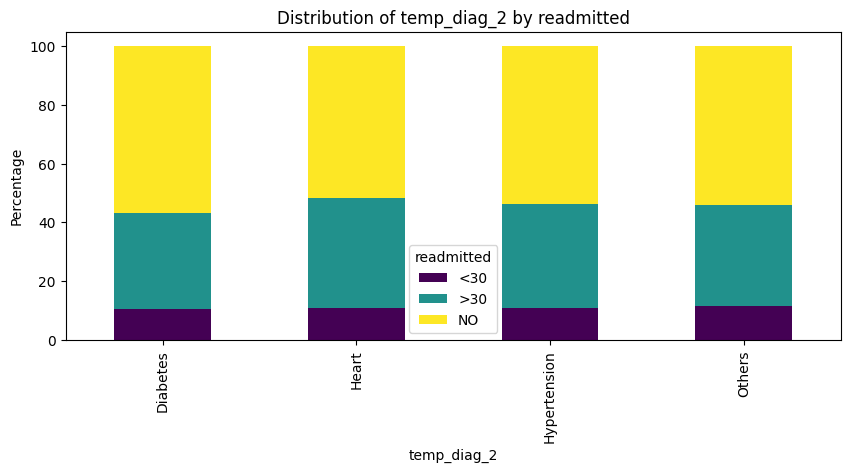

<Figure size 1000x400 with 0 Axes>

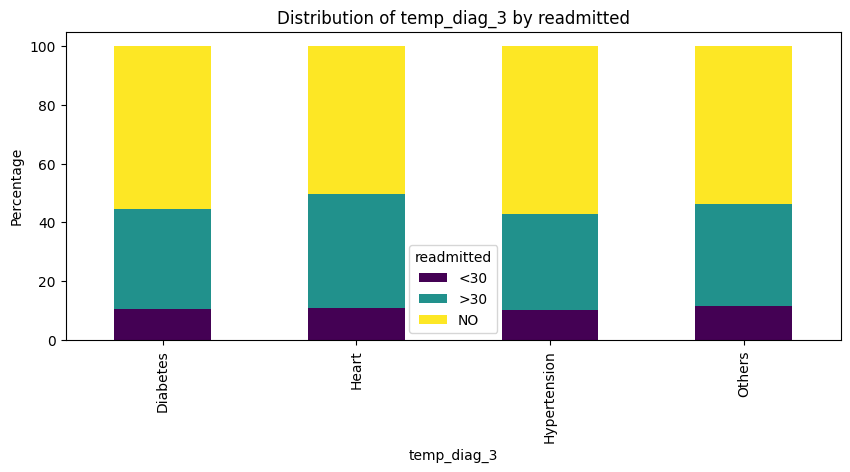

In [23]:
def categorize_code(code):
    try:
        code = float(code)
        if 250 <= code < 251:
            return 'Diabetes'
        elif 401 <= code <= 405:
            return 'Hypertension'
        elif 410 <= code <= 429:
            return 'Heart'
        else:
            return 'Others'
    except ValueError:
        return 'Others'
for column in ['diag_1','diag_2','diag_3']:
    diabetes['temp_'+column] = diabetes[column].apply(categorize_code)
    eda_utils.barplot_target(diabetes, 'temp_'+column, 'readmitted', (10,4))

<Figure size 1000x400 with 0 Axes>

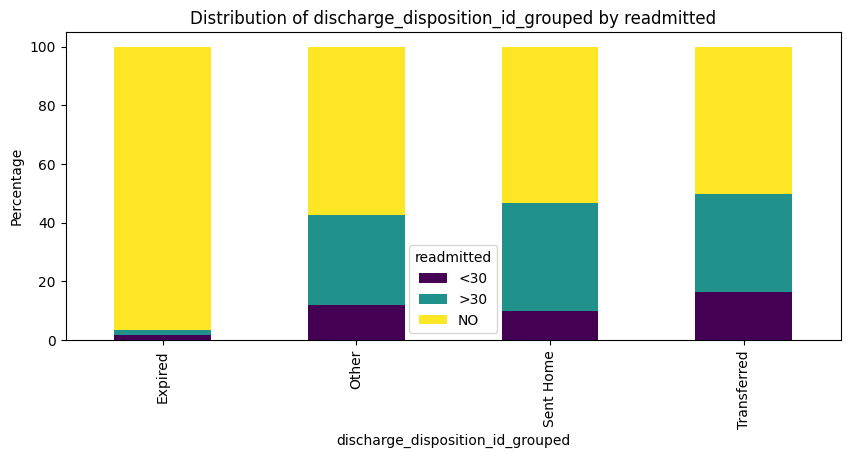

In [24]:
def map_discharge_disposition(discharge_id):
    if discharge_id in [1, 6, 8]:
        return 'Sent Home'
    elif discharge_id in [2, 3, 4, 5, 9, 12, 15, 16, 17, 22, 23, 24, 27, 28, 29, 30]:
        return 'Transferred'
    elif discharge_id in [11, 19, 20, 21, 13, 14]:
        return 'Expired'
    else:
        return 'Other'

diabetes['discharge_disposition_id_grouped'] = diabetes['discharge_disposition_id'].apply(map_discharge_disposition)
eda_utils.barplot_target(diabetes, 'discharge_disposition_id_grouped', 'readmitted', (10,4))

c:\Users\USUARIO\Documents\cursos\globant-diabetes-test\globant-diabetes\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


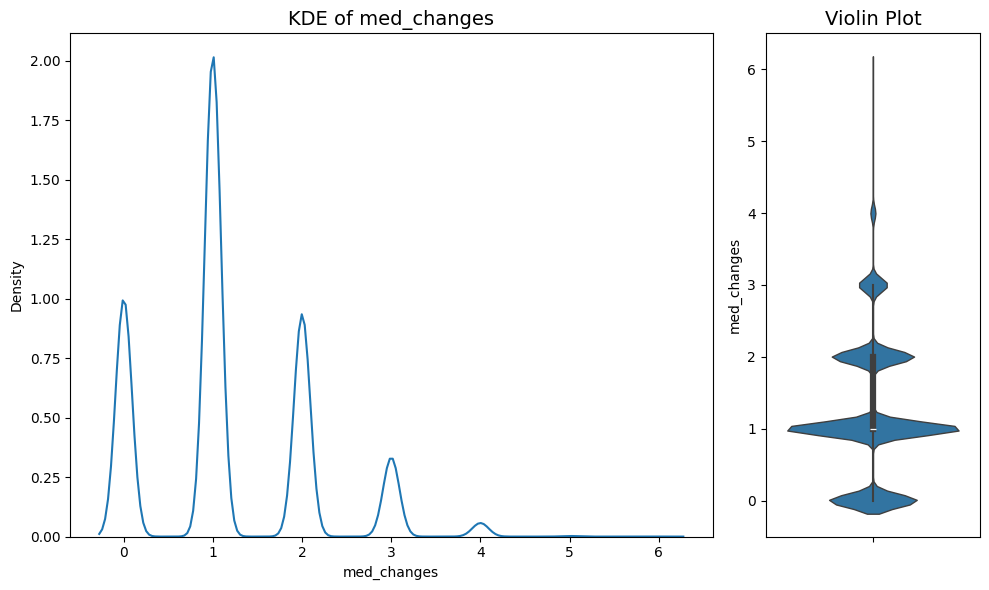

In [25]:
medicaments = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
               'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
               'tolazamide', 'examide', 'citoglipton', 'insulin',
               'glyburide-metformin', 'glipizide-metformin']
diabetes['med_changes'] = diabetes[medicaments].apply(lambda row: sum(1 if value not in ['No', 'steady'] else 0 for value in row), axis=1)
eda_utils.histplot_with_violin(diabetes, 'med_changes')

<Figure size 1000x400 with 0 Axes>

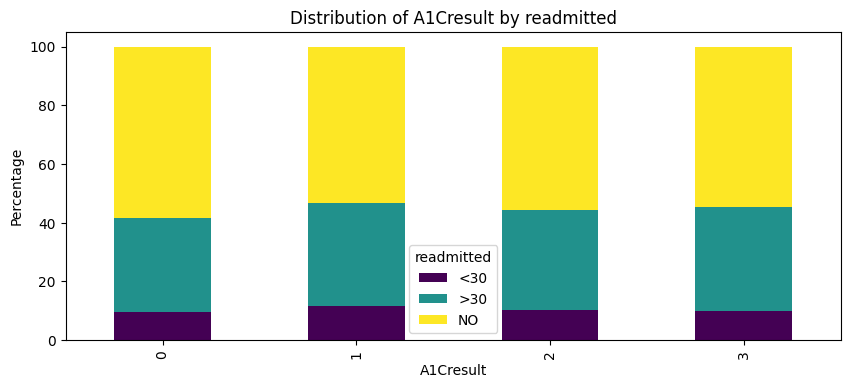

In [26]:
diabetes['A1Cresult'] = diabetes['A1Cresult'].fillna('None')
mapping_a1c = {'Norm': 0, 'None': 1, '>7': 2, '>8': 3}
diabetes['A1Cresult'] = diabetes['A1Cresult'].map(mapping_a1c)
eda_utils.barplot_target(diabetes, 'A1Cresult', 'readmitted', (10,4))

<Figure size 1000x400 with 0 Axes>

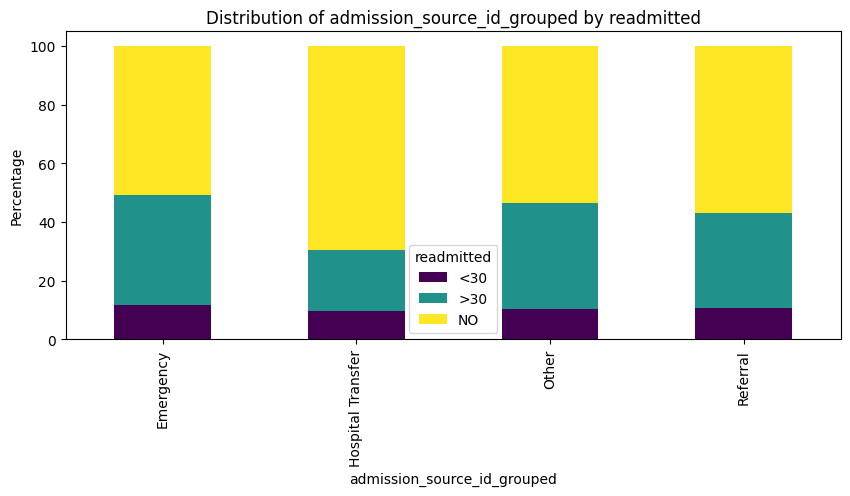

In [27]:
def map_admission_source(admission_id):
    if admission_id in [4, 5, 6, 10, 18, 22, 25, 26]:
        return 'Hospital Transfer'
    elif admission_id in [1, 2, 3]:
        return 'Referral'
    elif admission_id in [7, 8, 9, 20, 21]:
        return 'Emergency'
    elif admission_id in [11, 12, 13, 14, 23, 24]:
        return 'Other'
    else:
        return 'Other'
diabetes['admission_source_id_grouped'] = diabetes['admission_source_id'].apply(map_admission_source)
eda_utils.barplot_target(diabetes, 'admission_source_id_grouped', 'readmitted', (10,4))

In [28]:
medication_mapping = {'No': 0, 'Steady': 1, 'Up': 2, 'Down': 2}
for column in medicaments:
    print(diabetes[column].map(medication_mapping).value_counts())

metformin
0    81778
1    18346
2     1642
Name: count, dtype: int64
repaglinide
0    100227
1      1384
2       155
Name: count, dtype: int64
nateglinide
0    101063
1       668
2        35
Name: count, dtype: int64
chlorpropamide
0    101680
1        79
2         7
Name: count, dtype: int64
glimepiride
0    96575
1     4670
2      521
Name: count, dtype: int64
acetohexamide
0    101765
1         1
Name: count, dtype: int64
glipizide
0    89080
1    11356
2     1330
Name: count, dtype: int64
glyburide
0    91116
1     9274
2     1376
Name: count, dtype: int64
tolbutamide
0    101743
1        23
Name: count, dtype: int64
pioglitazone
0    94438
1     6976
2      352
Name: count, dtype: int64
rosiglitazone
0    95401
1     6100
2      265
Name: count, dtype: int64
acarbose
0    101458
1       295
2        13
Name: count, dtype: int64
miglitol
0    101728
1        31
2         7
Name: count, dtype: int64
troglitazone
0    101763
1         3
Name: count, dtype: int64
tolazamide
0    10172

# Conclusions

The proposed model for this analysis is a multiclass classification model. <br> 
The target categories are imbalanced, so implementing a balancing method could improve prediction accuracy. <br>
The features require preprocessing before they can be used as predictive inputs. <br>
Key insights include:
* Outlier treatment is necessary.
* The features 'Examide' and 'Citoglipton' should be removed.
* Categorical variables need more refined mapping and grouping.
* IDs should be excluded from the feature set.
